In [12]:
import zipfile
import os

# مسار ملف ZIP
zip_path = 'dogs-vs-cats/train.zip'
extract_to = 'dogs-vs-cats/train'

# فك الضغط
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("extract is suc")



extract is suc


In [1]:
train_dir="dogs-vs-cats/train/"
validation_dir="dogs-vs-cats/test1/"

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# إعداد مولد البيانات للتدريب مع التحويلات
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,         # إعادة قياس القيم إلى [0, 1]
    rotation_range=20,         # تدوير الصور عشوائيًا
    width_shift_range=0.2,     # تحريك الصور أفقيًا
    height_shift_range=0.2,    # تحريك الصور رأسيًا
    shear_range=0.2,           # قص الصور
    zoom_range=0.2,            # تكبير/تصغير الصور
    horizontal_flip=True,      # عكس الصور أفقيًا
    fill_mode='nearest'        # ملء المساحات الفارغة بعد التحويل
)

# إعداد مولد البيانات للتحقق
validation_datagen = ImageDataGenerator(
    rescale=1.0/255.0  # إعادة قياس القيم إلى [0, 1]
)

# إعداد بيانات التدريب
train_generator = train_datagen.flow_from_directory(
    train_dir,              # مسار بيانات التدريب
    target_size=(150, 150),    # تغيير حجم الصور (الطول والعرض)
    batch_size=20,             # حجم الدفعة
    class_mode='binary'   # وضع التصنيف (للفئات المتعددة)
)

# إعداد بيانات التحقق
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,         # مسار بيانات التحقق
    target_size=(150, 150),    # تغيير حجم الصور (الطول والعرض)
    batch_size=20,             # حجم الدفعة
    class_mode='binary'   # وضع التصنيف (للفئات المتعددة)
)



Found 25000 images belonging to 1 classes.
Found 12500 images belonging to 1 classes.


In [3]:
from tensorflow.keras import layers, models

# إنشاء نموذج بسيط
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # لأنك تستخدم `binary` كتصنيف
])

# تجميع النموذج
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


C:\Users\Dell\conda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,  # عدد الدفعات في كل عصر تدريب
    epochs=30,            # عدد الفترات التدريبية
    validation_data=validation_generator,
    validation_steps=50   # عدد الدفعات في التحقق
)

C:\Users\Dell\conda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step - accuracy: 0.9818 - loss: 0.0366

C:\Users\Dell\conda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 45s 420ms/step - accuracy: 0.9820 - loss: 0.0363 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 43s 429ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 51s 509ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 57s 570ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 53s 537ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 51s 510ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 51s 513ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 48

C:\Users\Dell\conda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 235ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 14/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 56s 555ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 15/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 54s 544ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 16/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 55s 549ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 17/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 52s 526ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 18/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 49s 495ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 19/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 49s 492ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 20/30
100/100 ━━━━━━━━━━━━

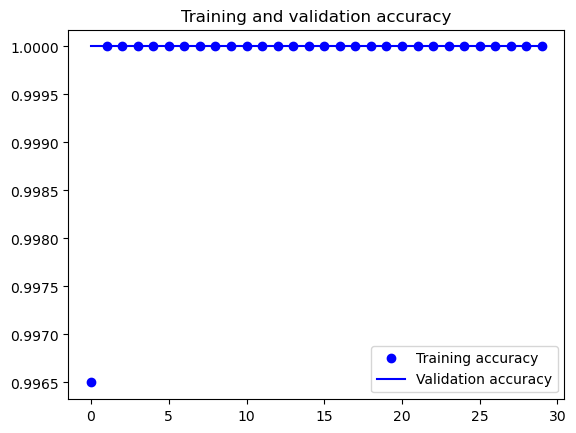

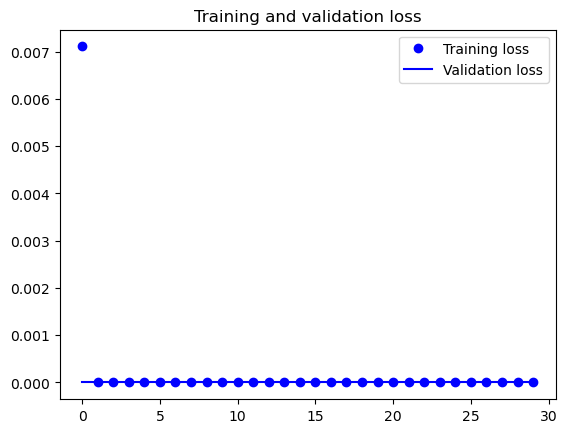

In [6]:
import matplotlib.pyplot as plt

# رسم دقة النموذج
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [7]:
from tensorflow.keras.datasets import cifar10

# تحميل بيانات CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# تطبيع البيانات (Normalization) لجعل القيم بين 0 و 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0


In [8]:
from tensorflow.keras.datasets import mnist

# تحميل بيانات MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# إضافة قناة للأبعاد (لأن MNIST رمادي اللون)
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0


In [9]:
from tensorflow.keras.utils import to_categorical

# تحويل y_train و y_test إلى One-Hot Encoding
num_classes = 10  # عدد الفئات
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [10]:
print(f"x_train shape: {x_train.shape}")  # بيانات التدريب
print(f"y_train shape: {y_train.shape}")  # تسميات التدريب
print(f"x_test shape: {x_test.shape}")    # بيانات التحقق
print(f"y_test shape: {y_test.shape}")    # تسميات التحقق


x_train shape: (60000, 28, 28, 1)
y_train shape: (60000, 10)
x_test shape: (10000, 28, 28, 1)
y_test shape: (10000, 10)


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# تحديد أبعاد الإدخال
input_shape = (28, 28, 1)  # صور رمادية
num_classes = 10           # عدد الفئات

# بناء النموذج
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# تجميع النموذج
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# عرض ملخص النموذج
model.summary()


C:\Users\Dell\conda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# إنشاء مولد بيانات مع التحولات
datagen = ImageDataGenerator(
    rotation_range=20,      # تدوير الصور حتى 20 درجة
    width_shift_range=0.2,  # تغيير الموقع أفقيًا حتى 20% من العرض
    height_shift_range=0.2, # تغيير الموقع عموديًا حتى 20% من الارتفاع
    shear_range=0.2,        # قص الصور (shear)
    zoom_range=0.2,         # تكبير الصور
    horizontal_flip=True,   # قلب الصور أفقيًا
    fill_mode='nearest'     # ملء المساحات الناتجة عن التحويلات
)

# تدريب النموذج مع مولد البيانات
batch_size = 64
train_generator = datagen.flow(x_train, y_train, batch_size=batch_size)

model.fit(train_generator, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 59s 60ms/step - accuracy: 0.5558 - loss: 1.2778 - val_accuracy: 0.9284 - val_loss: 0.2261
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 60ms/step - accuracy: 0.8479 - loss: 0.4708 - val_accuracy: 0.9556 - val_loss: 0.1402
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 59s 62ms/step - accuracy: 0.8914 - loss: 0.3399 - val_accuracy: 0.9600 - val_loss: 0.1251
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 47s 50ms/step - accuracy: 0.9137 - loss: 0.2780 - val_accuracy: 0.9701 - val_loss: 0.0967
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 56ms/step - accuracy: 0.9258 - loss: 0.2359 - val_accuracy: 0.9665 - val_loss: 0.1014
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 55ms/step - accuracy: 0.9314 - loss: 0.2150 - val_accuracy: 0.9676 - val_loss: 0.0964
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 54s 58ms/step - accuracy: 0.9369 - loss: 0.1980 - val_accuracy: 0.9762 - val_loss: 0.0681
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 53s 56ms/step - accuracy: 0.9425 - loss: 0.1790 - 

In [42]:
import numpy as np
# Assuming y_train and y_test are one-hot encoded, convert them to integer labels
y_train = np.argmax(y_train, axis=-1)  # Convert from one-hot to integer labels
y_test = np.argmax(y_test, axis=-1)    # Convert from one-hot to integer labels


In [43]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define model input shape
input_shape = (28, 28, 3)

# Define the model
model = Sequential([
    # Convolutional layers
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten layer to reshape the output
    Flatten(),
    
    # Dense layers
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # Assuming 10 classes for classification
])

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# Augmentation function
def augment_image(image, label):
    image = tf.image.resize(image, [28, 28])  # Resize to 28x28
    image = tf.image.random_flip_left_right(image)  # Flip horizontally
    image = tf.image.random_flip_up_down(image)  # Flip vertically
    image = tf.image.random_brightness(image, max_delta=0.1)  # Random brightness
    image = tf.image.random_contrast(image, 0.8, 1.2)  # Random contrast
    return image, label

# Create train dataset with augmentation
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.map(augment_image).batch(batch_size).shuffle(1000)

# Train the model
model.fit(train_dataset, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 18ms/step - accuracy: 0.7551 - loss: 0.7358 - val_accuracy: 0.9274 - val_loss: 0.2210
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - accuracy: 0.9448 - loss: 0.1808 - val_accuracy: 0.9466 - val_loss: 0.1657
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 37s 19ms/step - accuracy: 0.9607 - loss: 0.1265 - val_accuracy: 0.9588 - val_loss: 0.1295
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 0.9688 - loss: 0.0993 - val_accuracy: 0.9674 - val_loss: 0.1004
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 36s 18ms/step - accuracy: 0.9725 - loss: 0.0889 - val_accuracy: 0.9759 - val_loss: 0.0745
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.9759 - loss: 0.0758 - val_accuracy: 0.9692 - val_loss: 0.0944
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 14ms/step - accuracy: 0.9779 - loss: 0.0675 - val_accuracy: 0.9721 - val_loss: 0.0881
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9810 - loss: 0.0597 - 

In [44]:
from tensorflow.keras.layers import Dropout

model.add(Dropout(0.5))  # يسقط 50% من الوحدات في الطبقة


In [45]:
from tensorflow.keras.regularizers import l2

model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))


In [69]:
input_shape = (28, 28, 1)  # Update to 1 channel for grayscale
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])


In [70]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 3)
(10000, 28, 28, 3)


In [71]:
import numpy as np

# تأكد من أن البيانات هي مصفوفات NumPy
x_train = np.array(x_train)
x_test = np.array(x_test)

# التأكد من الأبعاد
print(x_train.shape)  # يجب أن تكون (60000, 28, 28, 3)
print(x_test.shape)   # يجب أن تكون (10000, 28, 28, 3)


(60000, 28, 28, 3)
(10000, 28, 28, 3)


In [72]:
import cv2

# تحويل الصور من RGB إلى Grayscale
x_train_gray = np.array([cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in x_train])
x_test_gray = np.array([cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) for image in x_test])

# إضافة القناة الثالثة لكي تتوافق مع شكل المدخلات المطلوبة
x_train_gray = x_train_gray[..., np.newaxis]
x_test_gray = x_test_gray[..., np.newaxis]

# التأكد من الأبعاد بعد التحويل
print(x_train_gray.shape)  # يجب أن تكون (60000, 28, 28, 1)
print(x_test_gray.shape)   # يجب أن تكون (10000, 28, 28, 1)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [74]:
from tensorflow.keras.utils import to_categorical

# تحويل التسميات إلى one-hot encoding
y_test_one_hot = to_categorical(y_test, num_classes=10)  # افترض أن لديك 10 فئات

# تدريب النموذج مع البيانات المحوّلة
model.fit(train_generator, epochs=50, validation_data=(x_test_gray, y_test_one_hot), callbacks=[early_stop])


Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.8384 - loss: 0.5055 - val_accuracy: 0.9502 - val_loss: 0.1696
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.8861 - loss: 0.3622 - val_accuracy: 0.9646 - val_loss: 0.1173
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.9070 - loss: 0.3032 - val_accuracy: 0.9688 - val_loss: 0.0957
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.9185 - loss: 0.2592 - val_accuracy: 0.9671 - val_loss: 0.1018
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.9291 - loss: 0.2275 - val_accuracy: 0.9637 - val_loss: 0.1103
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.9348 - loss: 0.2100 - val_accuracy: 0.9720 - val_loss: 0.0804
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 31s 33ms/step - accuracy: 0.9405 - loss: 0.1917 - val_accuracy: 0.9791 - val_loss: 0.0651
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.9466 - loss: 0.1727 - 

In [77]:
# تقييم النموذج على بيانات الاختبار
test_loss, test_accuracy = model.evaluate(x_test_gray, y_test_one_hot)
print(f"Test accuracy: {test_accuracy}, Test loss: {test_loss}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9679 - loss: 0.0987
Test accuracy: 0.9742000102996826, Test loss: 0.08025074750185013


In [83]:
history = model.fit(train_generator, epochs=50, validation_data=(x_test_gray, y_test_one_hot), callbacks=[early_stop])


Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.9540 - loss: 0.1473 - val_accuracy: 0.9770 - val_loss: 0.0711
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 34s 36ms/step - accuracy: 0.9568 - loss: 0.1390 - val_accuracy: 0.9787 - val_loss: 0.0613
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.9539 - loss: 0.1422 - val_accuracy: 0.9781 - val_loss: 0.0707
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 32s 34ms/step - accuracy: 0.9578 - loss: 0.1326 - val_accuracy: 0.9781 - val_loss: 0.0700
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 35ms/step - accuracy: 0.9578 - loss: 0.1316 - val_accuracy: 0.9804 - val_loss: 0.0624
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 34s 36ms/step - accuracy: 0.9595 - loss: 0.1288 - val_accuracy: 0.9826 - val_loss: 0.0517
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 34s 36ms/step - accuracy: 0.9614 - loss: 0.1218 - val_accuracy: 0.9799 - val_loss: 0.0624
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 35s 37ms/step - accuracy: 0.9602 - loss: 0.1267 - 

In [84]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


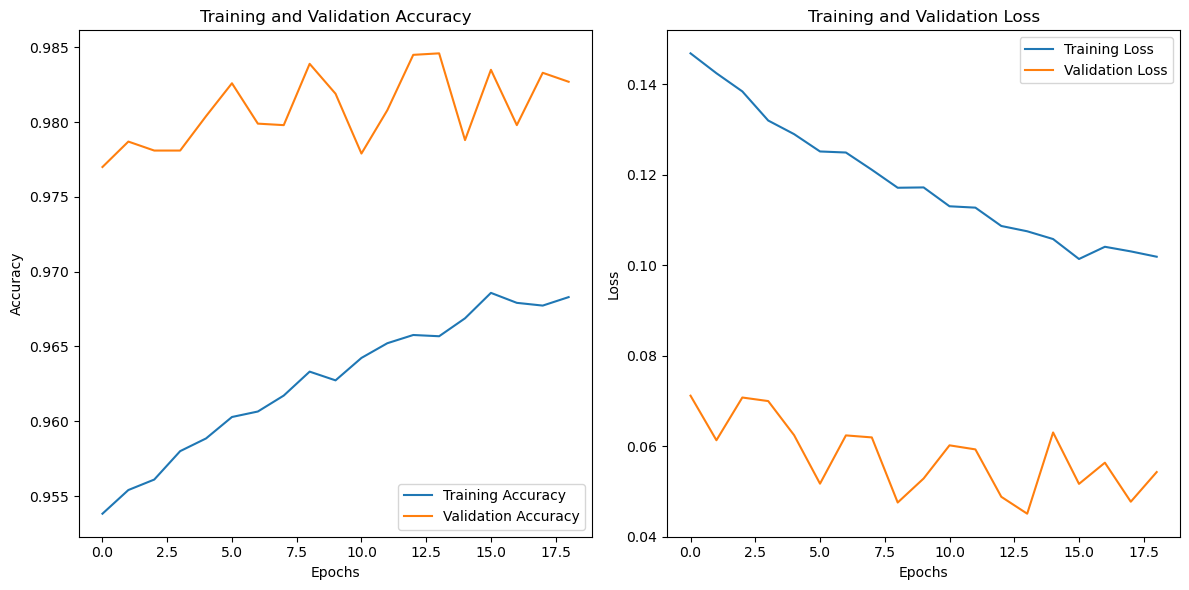

In [86]:
import matplotlib.pyplot as plt

# رسم دقة التدريب والاختبار
plt.figure(figsize=(12, 6))

# دقة التدريب
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# خسارة التدريب والاختبار
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [87]:
model.save('cats_vs_dogs_modelnew.h5')